In [6]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from Bio import Entrez
from Bio import SeqIO


In [7]:
Entrez.email = "zuzana.buchova04@gmail.com"

def download_genbank_records(accession_numbers, output_file):
    # Open the output file in write mode
    with open(output_file, "w") as out_handle:
        for accession_number in accession_numbers:
            print(f"Downloading {accession_number}...")
            
            # Fetch the GenBank record from NCBI
            handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text")
            
            # Parse the GenBank record
            record = SeqIO.read(handle, "genbank")
            
            # Write the record to the output file
            SeqIO.write(record, out_handle, "genbank")
            
            # Close the handle
            handle.close()
    
    print(f"All GenBank records saved to {output_file}")

# Example usage for multiple accession numbers
accession_numbers = ["MZ344997.1", "MW598419.1", "MZ009823.1", "MW642250.1", "OL672836.1"]
output_file = "all_sequences.gb"  # Output file for all GenBank records

# Download and save the GenBank records
download_genbank_records(accession_numbers, output_file)

def extract_protein_ids(genbank_file):
    protein_ids = set()  # Use a set to avoid duplicates
    
    # Parse the GenBank file
    for record in SeqIO.parse(genbank_file, "genbank"):
        # Iterate through each feature in the GenBank record
        for feature in record.features:
            if feature.type == "CDS":  # Look for CDS features which typically have protein_ids
                protein_id = feature.qualifiers.get('protein_id', [None])[0]  # Get the protein_id
                if protein_id:  # Only add if a protein_id is found
                    protein_ids.add(protein_id)
    
    return protein_ids

# Example usage
genbank_file = "all_sequences.gb"  # Replace with your GenBank file
protein_ids = extract_protein_ids(genbank_file)

# Print all found protein IDs
if protein_ids:
    print("Protein IDs found in the GenBank file:")
    for pid in protein_ids:
        print(pid)
else:
    print("No protein IDs found in the GenBank file.")


All GenBank records saved to all_sequences.gb
Protein IDs found in the GenBank file:
UFO69282.1
QRX39432.1
UFO69281.1
QRN78352.1
QWE88925.1
QRN78351.1
UFO69279.1
QUD52768.1
QRN78355.1
QWE88918.1
QWE88927.1
UFO69288.1
QWE88926.1
QWE88923.1
QRN78346.1
QRX39430.1
UFO69283.1
QUD52773.1
QRX39428.1
QRN78350.1
QUD52770.1
UFO69286.1
UFO69280.1
QWE88920.1
UFO69278.1
QRN78354.1
UFO69277.1
QWE88919.1
QRX39431.1
QWE88921.1
QUD52762.1
QUD52764.1
QRN78345.1
QRN78348.1
QUD52767.1
QRX39433.1
QUD52765.1
QWE88924.1
QUD52771.1
QUD52772.1
QRX39434.1
UFO69284.1
UFO69287.1
QWE88928.1
QRX39425.1
QRX39423.1
QWE88929.1
QRX39426.1
QRN78347.1
QRX39427.1
QRN78349.1
QUD52766.1
QRX39424.1
QRN78356.1
QWE88922.1
QUD52769.1
UFO69285.1
QRX39429.1
QRN78353.1
QUD52763.1


In [8]:
from Bio import SeqIO

def extract_regions_by_protein_id(genbank_file, regions_per_protein_id):
    # Create a list to hold the extracted sequences as separate strings
    extracted_sequences = []

    # Parse the GenBank file
    for record in SeqIO.parse(genbank_file, "genbank"):
        print(f"Processing record: {record.id}")  # Debug statement
        
        # Iterate through each feature in the GenBank record
        for feature in record.features:
            if feature.type == "CDS":  # Typically, protein-coding regions are CDS
                protein_id = feature.qualifiers.get('protein_id', [None])[0]  # Get the protein_id
                print(f"Found protein_id: {protein_id}")  # Debug statement

                # Check if this protein_id has any regions specified
                if protein_id in regions_per_protein_id:
                    for start, end in regions_per_protein_id[protein_id]:
                        print(f"Extracting region: {start}-{end} for protein_id: {protein_id}")  # Debug statement
                        
                        # Convert 1-based coordinates to 0-based for Python slicing
                        start_idx = start - 1
                        end_idx = end

                        # Ensure that the coordinates are within the range of the sequence
                        if start_idx < 0 or end_idx > len(record.seq):
                            print(f"Warning: Specified coordinates {start}-{end} are out of range for the sequence.")
                            continue

                        # Extract the subsequence
                        subsequence = record.seq[start_idx:end_idx]

                        # Convert the sequence to a string and add to the list as a separate string
                        extracted_sequences.append(str(subsequence))

    if not extracted_sequences:
        print("No sequences were extracted.")
    else:
        print("Sequences extracted successfully.")

    # Return the list of extracted sequences
    return extracted_sequences

# Example usage

# Specify the GenBank file and regions for each protein ID
genbank_file = "all_sequences.gb"  # Replace with your GenBank file

# Dictionary mapping protein IDs to lists of (start, end) coordinates
regions_per_protein_id = {
    "QWE88920.1": [(21500, 25312)],
    "QRN78347.1": [(21554, 25366)],
    "QUD52764.1": [(21533, 25348)],
    "QRX39425.1": [(21554, 25375)],
    "UFO69279.1": [(21497, 25309)]
    # Add more genes and regions as needed
}

# Extract the regions and save them as separate strings in a list
extracted_sequences = extract_regions_by_protein_id(genbank_file, regions_per_protein_id)

# The extracted_sequences list now contains all the sequences as separate strings
print(extracted_sequences)


Processing record: MZ344997.1
Found protein_id: QWE88918.1
Found protein_id: QWE88919.1
Found protein_id: QWE88920.1
Extracting region: 21500-25312 for protein_id: QWE88920.1
Found protein_id: QWE88921.1
Found protein_id: QWE88922.1
Found protein_id: QWE88923.1
Found protein_id: QWE88924.1
Found protein_id: QWE88925.1
Found protein_id: QWE88926.1
Found protein_id: QWE88927.1
Found protein_id: QWE88928.1
Found protein_id: QWE88929.1
Processing record: MW598419.1
Found protein_id: QRN78345.1
Found protein_id: QRN78346.1
Found protein_id: QRN78347.1
Extracting region: 21554-25366 for protein_id: QRN78347.1
Found protein_id: QRN78348.1
Found protein_id: QRN78349.1
Found protein_id: QRN78350.1
Found protein_id: QRN78351.1
Found protein_id: QRN78352.1
Found protein_id: QRN78353.1
Found protein_id: QRN78354.1
Found protein_id: QRN78355.1
Found protein_id: QRN78356.1
Processing record: MZ009823.1
Found protein_id: QUD52762.1
Found protein_id: QUD52763.1
Found protein_id: QUD52764.1
Extracting 

In [ ]:
a = "kitten"
b = "sitting"
print(len(a))

6


In [10]:
def head(x):
    n = 1
    return x[:n]

def tail(x):
    n = len(x) - 1
    return x[-n:] if n > 0 else ''


In [11]:
def lev(a, b):
    #create a matrix to store distances
    dp = [[0 for j in range(len(b) + 1)] for i in range(len(a) + 1)]
    
    #initialize the first row and column of the matrix
    for i in range(len(a) + 1):
        dp[i][0] = i
    for j in range(len(b) + 1):
        dp[0][j] = j
    
    #fill the matrix
    for i in range(1, len(a) + 1):
        for j in range(1, len(b) + 1):
            if a[i - 1] == b[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j],    #deletion
                                   dp[i][j - 1],    #insertion
                                   dp[i - 1][j - 1]) #substitution
    
    return dp[len(a)][len(b)]

a = "kitten"
b = "sitting"


distance = lev(a, b)
print(f"The Levenshtein distance between '{a}' and '{b}' is {distance}.")


The Levenshtein distance between 'kitten' and 'sitting' is 3.


In [12]:
#initialize the distance matrix
n = len(extracted_sequences)
distance_matrix = np.zeros((n, n))

#compute pairwise Levenshtein distances
for i in range(n):
    for j in range(i + 1, n):
        distance = lev(extracted_sequences[i], extracted_sequences[j])
        distance_matrix[i][j] = distance
        distance_matrix[j][i] = distance

print("Levenshtein Distance Matrix:")
print(distance_matrix)

Levenshtein Distance Matrix:
[[ 0. 28. 26. 24. 47.]
 [28.  0. 27. 22. 64.]
 [26. 27.  0. 23. 62.]
 [24. 22. 23.  0. 60.]
 [47. 64. 62. 60.  0.]]


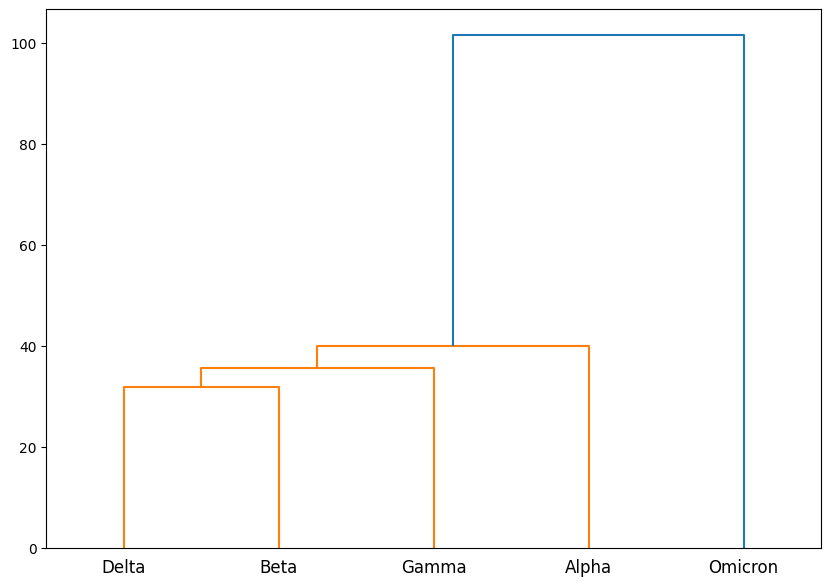

In [13]:
genes = ["Alpha", "Beta", "Gamma", "Delta", "Omicron"]
#convert the distance matrix to a condensed form for linkage function
condensed_dist_matrix = pdist(distance_matrix)

#UPGMA
linked = linkage(condensed_dist_matrix, method='average')

#plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=genes, distance_sort='descending', show_leaf_counts=True)
plt.show()
